# Discrete Probability Distributions for Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
start = '2021-01-01'
end = '2022-01-01'
symbol = 'AMD'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400


In [3]:
dataset.shape

(252, 6)

In [4]:
x = np.array(dataset['Adj Close']).squeeze()

In [5]:
import collections

repeat_numbers = [item for item, count in collections.Counter(x).items() if count > 1]

In [6]:
repeat_numbers

[79.05999755859375, 82.76000213623047, 78.55000305175781, 106.1500015258789]

In [7]:
from scipy.stats import binom

In [8]:
p = 0.5 # 50% Success
k = 100 # Number of Trials

# define the distribution
dist = binom(k, p)
for n in repeat_numbers:
	print('P of {} success: {}'.format(n, round(dist.pmf(n)*100),6))

P of 79.05999755859375 success: 0
P of 82.76000213623047 success: 0
P of 78.55000305175781 success: 0
P of 106.1500015258789 success: 0


In [9]:
p = 0.5 # 50% Success
k = 100 # Number of Trials

# define the distribution
dist = binom(k, p)
for n in repeat_numbers:
	print('P of {} success: {}'.format(n, round(dist.cdf(n)*100),6))

P of 79.05999755859375 success: 100
P of 82.76000213623047 success: 100
P of 78.55000305175781 success: 100
P of 106.1500015258789 success: 100


In [10]:
min_n = min(repeat_numbers)
max_n = max(repeat_numbers)

In [11]:
p = 0.5 # 50% Success
k = 100 # Number of Trials

# define the distribution
dist = binom(k, p)
for n in range(int(min_n), int(max_n), 2):
	print('P of {} success: {}'.format(n, round(dist.pmf(n)*100),6))

P of 78 success: 0
P of 80 success: 0
P of 82 success: 0
P of 84 success: 0
P of 86 success: 0
P of 88 success: 0
P of 90 success: 0
P of 92 success: 0
P of 94 success: 0
P of 96 success: 0
P of 98 success: 0
P of 100 success: 0
P of 102 success: 0
P of 104 success: 0


In [12]:
probabilities = [0.2, 0.3, 0.3, 0.2]

np.random.choice(repeat_numbers, 10, p=probabilities)

array([ 78.55000305, 106.15000153, 106.15000153,  78.55000305,
        79.05999756,  78.55000305,  82.76000214,  82.76000214,
        82.76000214, 106.15000153])

In [13]:
from scipy.stats import rv_discrete  

distrib = rv_discrete(values=(repeat_numbers, probabilities))
distrib.rvs(size=10)


array([106,  78, 106,  78,  79,  82, 106, 106,  82,  82])

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

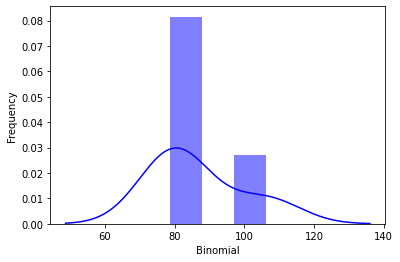

In [14]:
ax=sns.distplot(repeat_numbers,
                kde=True,
                color='blue',
                hist_kws={"linewidth":10,'alpha':0.50})
ax.set(xlabel='Binomial',ylabel='Frequency')

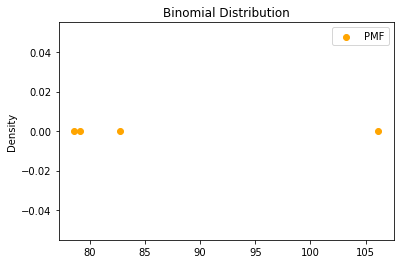

In [15]:
import scipy.stats as stats

binomial=stats.binom(n=0.05,p=0.002)
plt.scatter(repeat_numbers,binomial.pmf(repeat_numbers),label="PMF",color="Orange")
plt.title("Binomial Distribution")
plt.ylabel("Density")
plt.legend()
#plt.xticks(repeat_numbers)
plt.show()

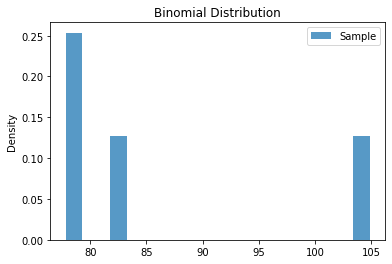

In [16]:
plt.hist(repeat_numbers,bins=14,density=True,align='left',rwidth=0.75,label="Sample",alpha=0.75)
plt.title("Binomial Distribution")
plt.ylabel("Density")
plt.legend()
#plt.xticks(repeat_numbers)
plt.show()

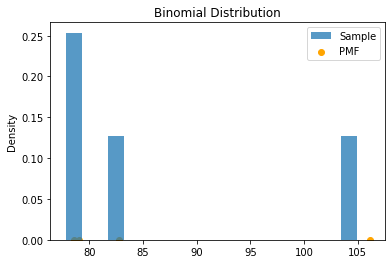

In [17]:
plt.hist(repeat_numbers,bins=14,density=True,align='left',rwidth=0.75,label="Sample",alpha=0.75)
plt.scatter(repeat_numbers,binomial.pmf(repeat_numbers),label="PMF",color="Orange")
plt.title("Binomial Distribution")
plt.ylabel("Density")
plt.legend()
#plt.xticks(repeat_numbers)
plt.show()

# Calculate Returns 

In [18]:
# View Columns
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,0.005092
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,-0.026302
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,0.053471
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,-0.006095
2021-01-11,94.029999,99.230003,93.760002,97.250000,97.250000,48600200,0.028230


In [19]:
r = np.array(dataset['Returns']).squeeze()
r

array([ 0.00509202, -0.02630155,  0.05347063, -0.00609502,  0.02823005,
       -0.01943444, -0.03754197, -0.01078664, -0.02841725,  0.01405734,
       -0.00782557,  0.03132393,  0.013766  ,  0.01444117,  0.00616171,
       -0.0619787 , -0.01485817, -0.02148077,  0.02358716,  0.01368922,
       -0.01091606, -0.00056893,  0.00068312,  0.04061433, -0.0061222 ,
        0.01583978,  0.00335685,  0.0119792 , -0.02463472, -0.01661925,
       -0.01445411,  0.01060472, -0.04699709, -0.0073797 ,  0.02596182,
       -0.05198993,  0.02535797,  0.02224585, -0.02616046, -0.03886838,
       -0.03846155,  0.00990349, -0.05807435,  0.06179015, -0.01286135,
        0.04785871, -0.00221593,  0.01789015,  0.0030303 , -0.00145018,
       -0.0545806 ,  0.0120327 ,  0.01568436, -0.02391041, -0.0242408 ,
       -0.00339961,  0.01561273, -0.00348798, -0.01477832,  0.03289474,
        0.03299358,  0.00419292,  0.00012283,  0.00933196,  0.01399029,
       -0.00707854, -0.05050749,  0.02048868, -0.02045142,  0.05

In [21]:

repeat_r = [item for item, count in collections.Counter(r).items() if count > -2]
repeat_r


[0.0050920214059477775,
 -0.02630155115128041,
 0.05347062695834204,
 -0.0060950169055702386,
 0.028230049875814567,
 -0.01943444102466263,
 -0.03754196526993381,
 -0.010786640629078414,
 -0.028417246448264377,
 0.014057339039104555,
 -0.007825567044426163,
 0.03132392990757049,
 0.013766001890469504,
 0.01444117172830417,
 0.006161710910212781,
 -0.06197870133381089,
 -0.014858169171954705,
 -0.021480773829153366,
 0.023587158884369464,
 0.013689218550202664,
 -0.010916061377903352,
 -0.0005689276607697691,
 0.0006831191995666508,
 0.04061433029410311,
 -0.006122199093914538,
 0.015839783896212767,
 0.0033568510353050307,
 0.01197920286086629,
 -0.024634719433623387,
 -0.0166192505825693,
 -0.014454114036796195,
 0.010604720756756114,
 -0.04699708638555955,
 -0.0073796985187249975,
 0.02596182007431147,
 -0.051989925759517,
 0.02535797153260111,
 0.02224585499817411,
 -0.026160460148136888,
 -0.03886837929182929,
 -0.03846154571947191,
 0.009903493801497243,
 -0.05807434734520478,
 0.

In [26]:
def Average(lst):
    return sum(lst) / len(lst)

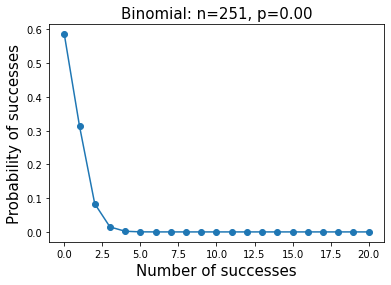

In [27]:
n = len(repeat_r)
p = Average(repeat_r)
k = np.arange(0,21)
binomial = binom.pmf(k,n,p)

plt.plot(k, binomial, 'o-')
plt.title("Binomial: n=%i, p=%.2f" % (n,p), fontsize=15)
plt.xlabel("Number of successes", fontsize=15)
plt.ylabel("Probability of successes", fontsize=15)
plt.show()

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

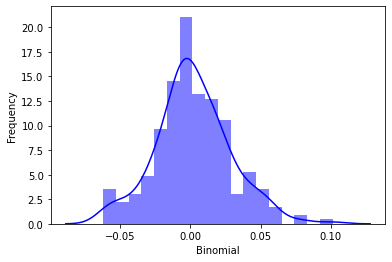

In [28]:
ax=sns.distplot(repeat_r,
                kde=True,
                color='blue',
                hist_kws={"linewidth":10,'alpha':0.50})
ax.set(xlabel='Binomial',ylabel='Frequency')

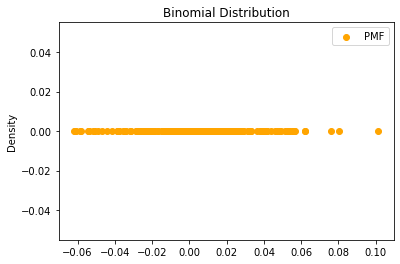

In [30]:
binomial=stats.binom(n=10,p=0.05)
plt.scatter(repeat_r,binomial.pmf(repeat_r),label="PMF",color="Orange")
plt.title("Binomial Distribution")
plt.ylabel("Density")
plt.legend()
#plt.xticks(repeat_numbers)
plt.show()